## DTS 305
**Name:** Solomon Ayuba | **Date:** Saturday, 29th March 2025


# Overview

This project, aimed at solidifying proficiency in data wrangling, web scraping, and feature engineering, consists of two parts, namely:

## Part 1: Cleaning and Analysing Tabular Data

**Tasks:** Using the provided dataset
1. Handle missing values in the `Total Amount` column.
2. Remove duplicate rows.
3. Standardize the formatting in the `Country` column to ensure uniform values.
4. Aggregate total revenue for each product category and visualize it with a bar chart.
5. Identify and plot the top 3 countries by total revenue.

**Deliverables:**
1. A cleaned version of the dataset in CSV format.
2. A Jupyter Notebook with detailed steps and code.
3. At least two visualizations (e.g., a bar chart of revenue by category, top countries by revenue).



## Part 2: Web Scraping and Feature Engineering

**Tasks:** Using the provided URL
- Use requests and BeautifulSoup to scrape Title, Price, Rating, Availability status for all books on the homepage
- Save the extracted data into a pandas DataFrame and export it as a CSV file.
- Clean the data:
    - Convert prices from strings to numerical values (remove symbols like £).
    - Map the ratings (e.g., "Three" = 3, "Five" = 5) to numerical values.

**Feature Engineering:**
- Create a new column categorizing books as "Affordable" (price < £20) or "Expensive" (price ≥ £20).
- Calculate the average rating for "Affordable" vs. "Expensive" books.
- Visualize the data:
    - Create a pie chart showing the proportion of affordable vs expensive books.
    - Plot a bar chart of average ratings by category (Affordable vs Expensive).

**Deliverables:**
- The final CSV file containing the scraped data.
- A Jupyter Notebook with the Python code and a step-by-step explanation.
- At least two visualisations (e.g., a pie chart for affordability, bar chart for ratings).

***(Refer to separate document for Practical Section)***

# Practical Section - Part 1

In [52]:
# importing the required libraries

import pandas as pd
import os
import matplotlib.pyplot as plt

In [54]:
# Loading the dataset ('Customer Orders Dataset.CSV' file) and displaying a few of its contents.

dataset = '/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/MiniProjectDataset.csv'
df = pd.read_csv(dataset)

df.head() 

,Order ID,Customer Name,Order Date,Product Category,Quantity,Price,Total Amount,Country
0,1,Customer 1,2022-06-01,Electronics,5,102.27,511.35,U.S.A.
1,2,Customer 2,2022-04-28,Fashion,3,195.72,587.16,usa
2,3,Customer 3,2022-04-08,Home Goods,5,176.54,882.70,U.S.A.
3,4,Customer 4,2022-10-20,Fashion,5,74.25,371.25,United States
4,5,Customer 5,2022-06-19,Fashion,3,192.70,578.10,U.S.A.


### Task 1: Handle missing values in the `Total Amount` Column

In [57]:
# Step 1: Verify that there are missing values in the 'Total Amount' column
missing_values = df['Total Amount'].isna().sum()
print(f"Total missing values from the 'Total Amount' Column is: {missing_values}")

Total missing values from the 'Total Amount' Column is: 19


In [59]:
# Step 2: Determine the best approach in handling the missing values

'''
The statistics derived from the 'Total Amount' column suggest that filling the missing values with the median(283.1) 
is ideal because the Median is robust against outliers, while the mean (322.5) is distorted by them. And the max(908.8) 
from this column is far above the 75th percentile (485.55), suggesting outliers
'''
totalAmount_stats = df['Total Amount'].describe()
totalAmount_stats

count     81.000000
mean     322.520494
std      233.834590
min       16.720000
25%      138.210000
50%      283.100000
75%      485.550000
max      908.800000
Name: Total Amount, dtype: float64

In [61]:
# Step 3: Fill the missing values with the median
median_value = df['Total Amount'].median()
df['Total Amount'] = df['Total Amount'].fillna(median_value)

# Step 4: Verifying that the missing values have been filled
missing_values = df['Total Amount'].isna().sum()
print(f"Total missing values from the 'Total Amount' Column is: {missing_values}")

Total missing values from the 'Total Amount' Column is: 0


### Task 2: Remove duplicate rows

In [64]:
# Step 1: Verify the presence of duplicate rows in the dataset

duplicate_rows = df.duplicated().sum()
print(F"Total Duplicate Rows: #{duplicate_rows}")

Total Duplicate Rows: #0


In [66]:
# Step 2: Verify the presence of duplicate rows in the 'Customer Names' column.

customer_duplicates = df.duplicated(subset=['Customer Name']).sum()
print(F"Total Duplicate Customers: {customer_duplicates}")

# Since there are no duplicates in the dataset there'll be no need to remove duplicate rows.
# In the event there are, this syntax will do the job: df = df.drop_duplicates()


Total Duplicate Customers: 0


### Task 3: Standardize the formatting in the Country column to ensure uniform values.

In [69]:
# Step 1: Display the unique values in the customer column to standardize by
unique_country = df['Country'].unique()

print(f" The unique values in 'Country' column are: {len(unique_country)} \n Namely: {unique_country}")

 The unique values in 'Country' column are: 3 
 Namely: ['U.S.A.' 'usa' 'United States']


In [71]:
# Step 2: Standardize using replace()

df['Country'] = df['Country'].str.strip().str.title() #Normalize case/whitespaces

df['Country'] = df['Country'].replace({
    'U.S.A.': 'United States',
    'usa': 'United States',
    'Usa': 'United States'
})

# verifying outcome
print(f" Unique values in 'Country' column: {df['Country'].unique()}")

 Unique values in 'Country' column: ['United States']


### Task 4: Aggregate total revenue for each product category and visualise it with a bar chart

In [50]:
# Step 1: Aggregate Total Revenue by Product Category
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()
revenue_by_category

,Product Category,Total Amount
0,Electronics,9503.46
1,Fashion,11821.43
2,Home Goods,10178.17


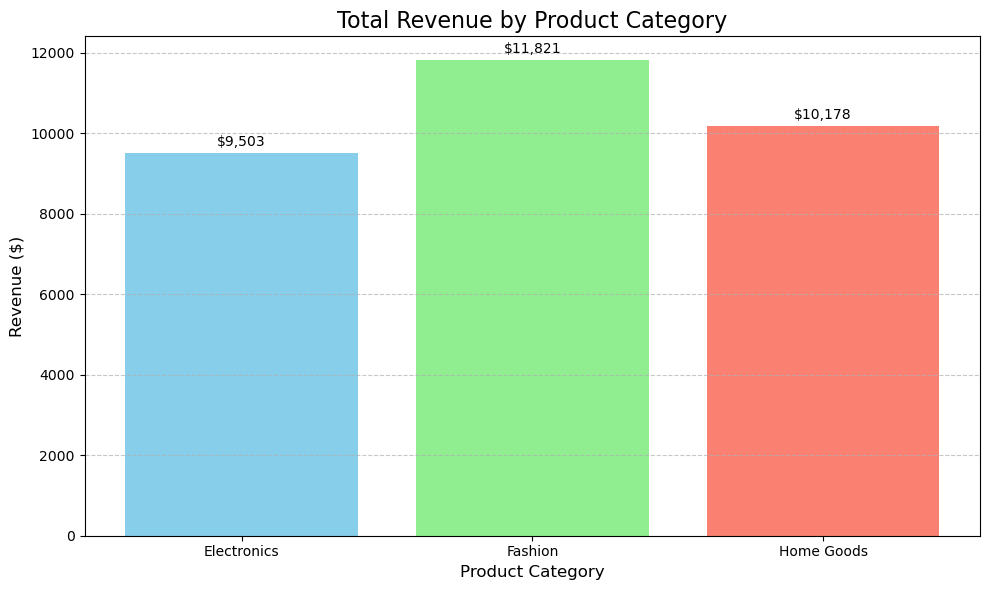


FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/Part1_total_revenue_by_product_category.png


In [506]:
# Step 2: Creating a Bar Chart

# Customizing the plot
plt.figure(figsize=(10,6))
bars = plt.bar(
    revenue_by_category['Product Category'],
    revenue_by_category['Total Amount'],
    color = ['skyblue', 'lightgreen', 'salmon']
)

# Adding labels and formatting
plt.title('Total Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
#plt.xticks(rotation=45, ha='left') #Rotate x-labels for readability

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 100, #Offset for visibility
        f'${height:,.0f}', # Format as currency
                         ha='center',
                         va='bottom'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Saving the bar chart as an image
plt.savefig('Part1_total_revenue_by_product_category.png', dpi=300, bbox_inches='tight')

# Displays the plot
plt.show()  

# Verifying the file saved
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('Part1_total_revenue_by_product_category.png')}")


### Task 5: Identify and plot the top 3 countries by total revenue.

In [509]:
df

,Order ID,Customer Name,Order Date,Product Category,Quantity,Price,Total Amount,Country
0,1,Customer 1,2022-06-01,Electronics,5,102.27,511.35,United States
1,2,Customer 2,2022-04-28,Fashion,3,195.72,587.16,United States
2,3,Customer 3,2022-04-08,Home Goods,5,176.54,882.70,United States
3,4,Customer 4,2022-10-20,Fashion,5,74.25,371.25,United States
4,5,Customer 5,2022-06-19,Fashion,3,192.70,578.10,United States
...,...,...,...,...,...,...,...,...
95,96,Customer 96,2022-10-14,Fashion,1,177.59,177.59,United States
96,97,Customer 97,2022-12-25,Fashion,1,97.13,283.10,United States
97,98,Customer 98,2022-01-25,Fashion,1,147.59,147.59,United States
98,99,Customer 99,2022-06-15,Home Goods,1,85.81,85.81,United States


In [511]:
# Step 1: Group by Country column and sum Total Amount (revenue)
revenue_by_country = df.groupby('Country')['Total Amount'].sum().reset_index()

# sort by revenue (descending order) to get top 3
top_countries = revenue_by_country.sort_values('Total Amount', ascending=False).head(3)
top_countries

,Country,Total Amount
0,United States,31503.06


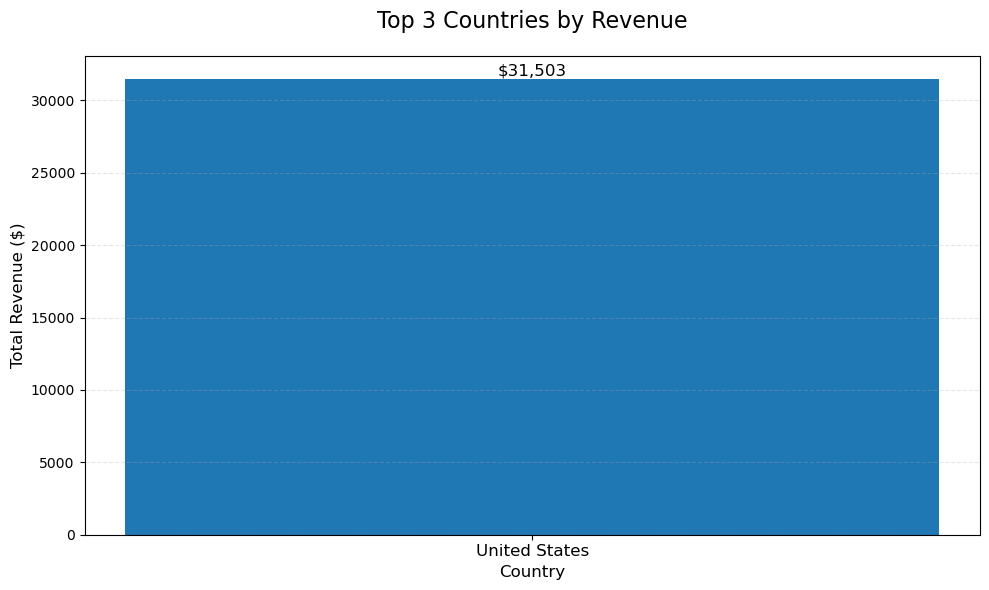


FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/Part1_top_3_countries_by_revenue.png


In [513]:
# Customize the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_countries['Country'], 
    top_countries['Total Amount'],
    color=['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
)

# Add labels and formatting
plt.title('Top 3 Countries by Revenue', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'${height:,.0f}',  # Format as currency
        ha='center', 
        va='bottom',
        fontsize=12
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Saving the bar chart as image

plt.savefig('Part1_top_3_countries_by_revenue.png', dpi=300, bbox_inches='tight')

# Displays the plot
plt.show()  

# Verifying the file saved
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('Part1_top_3_countries_by_revenue.png')}")
plt.show()

### Exporting cleaned dataset as CSV file

In [516]:
# Saving to the current working directory

df.to_csv('Part1_cleaned_sales_data.csv', index=False) 
print("FILE SAVED as: 'Part1_cleaned_sales_data.csv'")

# Verifying Export
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('Part1_cleaned_sales.data.csv')}")

FILE SAVED as: 'Part1_cleaned_sales_data.csv'

FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/Part1_cleaned_sales.data.csv
